<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/TF2_0_ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Tensorflow
import tensorflow as tf

In [ ]:
# Other import
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between (-3, +3)
Y = np.cos(2*X[:, 0]) + np.cos(3*X[:, 1])

This implements the function:       

Explanation:
Defining the Function:

The function
𝑦
=
cos
⁡
(
2
𝑥
1
)
+
cos
⁡
(
3
𝑥
2
)
y=cos(2x
1
​
 )+cos(3x
2
​
 ) is defined using def func(x1, x2).
Generating a Grid of Values:

np.linspace(-2 * np.pi, 2 * np.pi, 400) generates 400 points between
−
2
𝜋
−2π and
2
𝜋
2π for both
𝑥
1
x
1
​
  and
𝑥
2
x
2
​
 .
np.meshgrid(x1, x2) creates a grid of these values.
Computing y Values:

The corresponding
𝑦
y values are computed using the function defined.
Creating a 3D Plot:

A 3D plot is created using mpl_toolkits.mplot3d.Axes3D.
The plot_surface method is used to plot the surface.
Labels for the axes and a title for the plot are added for better understanding.
This code will create a 3D surface plot of the function
𝑦
=
cos
⁡
(
2
𝑥
1
)
+
cos
⁡
(
3
𝑥
2
)
y=cos(2x
1
​
 )+cos(3x
2
​
 ), allowing you to visualize how
𝑦
y changes with
𝑥
1
x
1
​
  and
𝑥
2
x
2
​
 .

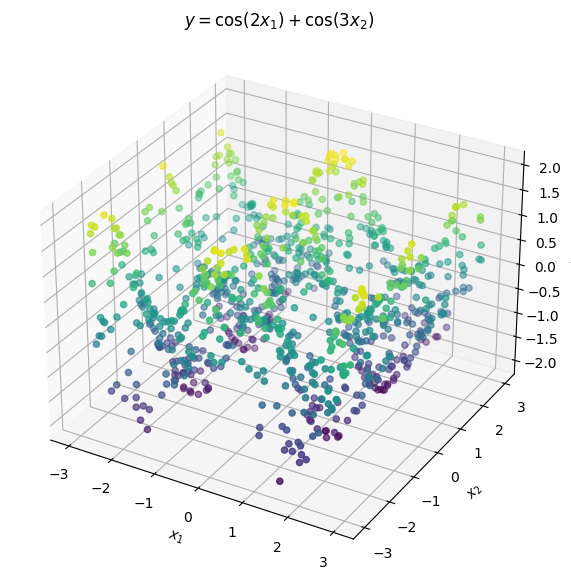

In [ ]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y, c=Y, cmap='viridis')

# Add labels
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
ax.set_title('$y = \cos(2x_1) + \cos(3x_2)$')

plt.show()

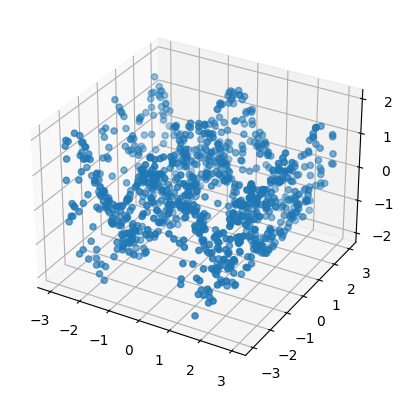

In [ ]:
#plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
# plt.show()

In [ ]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2, ), activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
# Compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.9232
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9053
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8846
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8574
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8213
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7859
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7679
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6606
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6199
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6151
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5520
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5361
Epoch 13/100
32/32 [=================

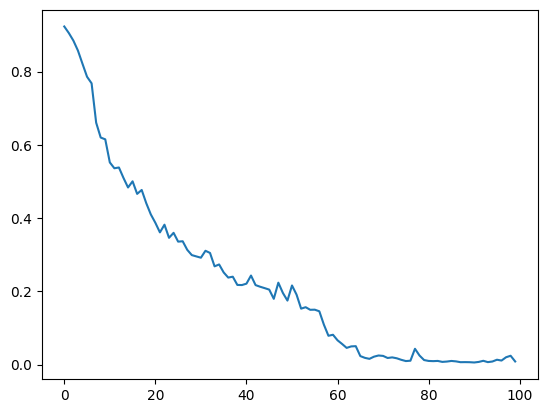

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

79/79 [==============================] - 0s 1ms/step


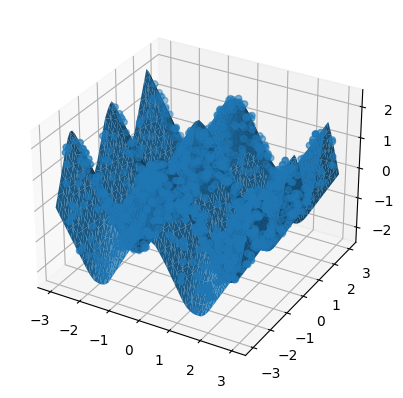

In [ ]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(xgrid).flatten()
ax.plot_trisurf(xgrid[:, 0], xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

79/79 [==============================] - 0s 2ms/step


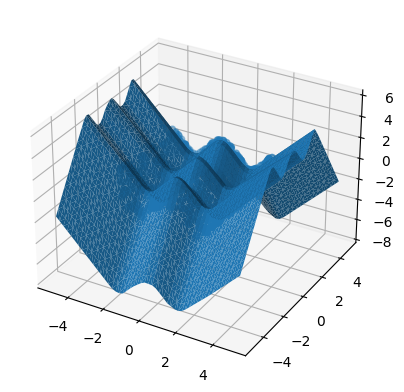

In [29]:
# Can it extrapolate?
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0],X[:, 1], Y)

#surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(xgrid).flatten()
ax.plot_trisurf(xgrid[:, 0], xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

#Explanation:
Defining the Function:

The function
𝑦
=
cos
⁡
(
2
𝑥
1
)
+
cos
⁡
(
3
𝑥
2
)
y=cos(2x
1
​
 )+cos(3x
2
​
 ) is defined as before.
Generating a Grid of Values:

We generate a grid of
𝑥
1
x
1
​
  and
𝑥
2
x
2
​
  values using np.linspace and np.meshgrid.
Flattening the Grid:

The grid is flattened using .flatten() to create one-dimensional arrays of
𝑥
1
x
1
​
  and
𝑥
2
x
2
​
  values.
Computing y Values:

The
𝑦
y values are computed using the flattened arrays.
Stacking x1 and x2:

The flattened
𝑥
1
x
1
​
  and
𝑥
2
x
2
​
  values are stacked into a single array x with shape (n_samples, 2).
Creating a 3D Scatter Plot:

A 3D scatter plot is created using ax.scatter.
The c=y argument is used to color the points based on their
𝑦
y values, and cmap='viridis' specifies the colormap.
Adding Labels:

Labels and a title are added to the plot for better understanding.
This code will produce a 3D scatter plot of the function
𝑦
=
cos
⁡
(
2
𝑥
1
)
+
cos
⁡
(
3
𝑥
2
)
y=cos(2x
1
​
 )+cos(3x
2
​
 ), allowing you to visualize the relationship between
𝑥
1
x
1
​
 ,
𝑥
2
x
2
​
 , and
𝑦
y.








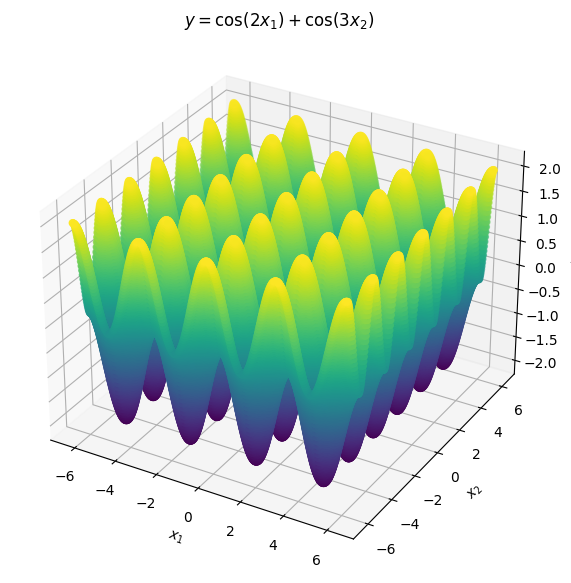

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def func(x1, x2):
    return np.cos(2 * x1) + np.cos(3 * x2)

# Generate a grid of x1 and x2 values
x1 = np.linspace(-2 * np.pi, 2 * np.pi, 400)
x2 = np.linspace(-2 * np.pi, 2 * np.pi, 400)
x1, x2 = np.meshgrid(x1, x2)

# Flatten the grid
x1_flat = x1.flatten()
x2_flat = x2.flatten()

# Compute the corresponding y values
y = func(x1_flat, x2_flat)

# Stack x1 and x2 values to create a single array of shape (n_samples, 2)
x = np.vstack((x1_flat, x2_flat)).T

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y, c=y, cmap='viridis')

# Add labels
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
ax.set_title('$y = \cos(2x_1) + \cos(3x_2)$')

plt.show()
